# Logistic Regression on Titanic Dataset

### 1. Importing Data and Python Packages

In [1]:
#Import libraries
import numpy as np
import pandas as pd

from sklearn import preprocessing 
import matplotlib.pyplot as plt
plt.rc("font",size = 14)
import seaborn as sns
sns.set(style="dark")
sns.set(style="whitegrid",color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [2]:
#Storing the data files into pandas dataframes
train_df = pd.read_csv(r'E:/IITm/Sem 7/Data Analytics Lab/Assignment 2 Oct 3rd/train.csv')
test_df = pd.read_csv(r'E:/IITm/Sem 7/Data Analytics Lab/Assignment 2 Oct 3rd/test.csv')

#Preview train dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print('The number of samples in the train data is {}.'.format(train_df.shape[0]))

The number of samples in the train data is 891.


In [4]:
#Preview test dataset
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print('The number of samples in the test data is {}.'.format(test_df.shape[0]))

The number of samples in the test data is 418.


### 2. Checking for missing values and cleaning the data.

In [6]:
train_df.shape

(891, 12)

In [7]:
test_df.shape

(418, 11)

In [8]:
train_df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [9]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

####   2.1 Age - missing values

In [10]:
print('Percentage of missing "Age" values is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))

Percentage of missing "Age" values is 19.87%


##### • ~20% of entries for passenger age are missing. Upon doing some additional analysis on the "Age" data, we find the following.

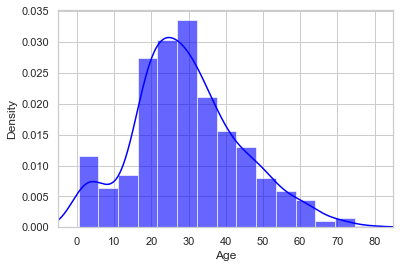

<Figure size 432x288 with 0 Axes>

In [51]:
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='blue', alpha=0.6)
train_df["Age"].plot(kind='density', color='blue')
ax.set(xlabel='Age')
plt.xlim(-5,85)
plt.show()
plt.savefig(r'E:\IITm\Sem 7\Data Analytics Lab\Assignment 2 Oct 3rd\Pics\AgeDensity.png')

In [12]:
#mean age
print('Mean of "Age" is %.2f' %(train_df["Age"].mean(skipna=True)))

#median age
print('Median of "Age" is %.2f' %(train_df["Age"].median(skipna=True)))

Mean of "Age" is 29.70
Median of "Age" is 28.00


##### • Since "Age" is skewed to the right, using the mean to fill the missing age values might give us biased results by filling in ages that are older than desired. So, we'll use the median to impute the missing values.
***

#### 2.2 Cabin - missing values

In [13]:
# percentage of missing samples in 'Cabin'
print('Percentage of missing "Cabin" values is %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

Percentage of missing "Cabin" values is 77.10%


##### • 77% of the records are missing from "Cabin" information. So this attribute will not be very useful in the prediction model. This attribute will be ignored.
***

#### 2.3 Embarked - missing values

In [14]:
# percent of missing "Embarked" 
print('Percentage of missing "Embarked" values is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Percentage of missing "Embarked" values is 0.22%


##### • There are only 2 (0.22%) missing values for "Embarked", so we can just impute with the port where most people boarded.

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


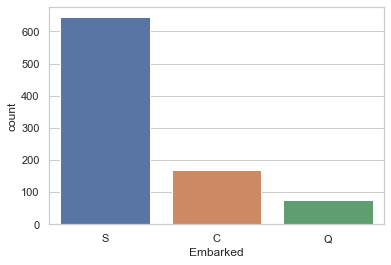

In [15]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=train_df)
plt.show()

In [16]:
print('The most common boarding port of embarkation is %s.' %train_df['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


##### • By far the most passengers boarded in Southhampton, so we'll impute the two missing values with "S"
***

#### 2.4 Final adjustments

##### Based on the above assessment of the missing values in the dataset,The following changes are made.
• If "Age" is missing for a given row, '28' (median) is imputed. <br>
• If "Embarked" is missing for a riven row, I'll impute with "S" (the most common boarding port). <br>
• The "Cabin" variable is ignored as there are too many missing values for imputation. <br>

In [17]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [18]:
# Checking for null values in the adjusted train data set 
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
# preview adjusted dataset
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


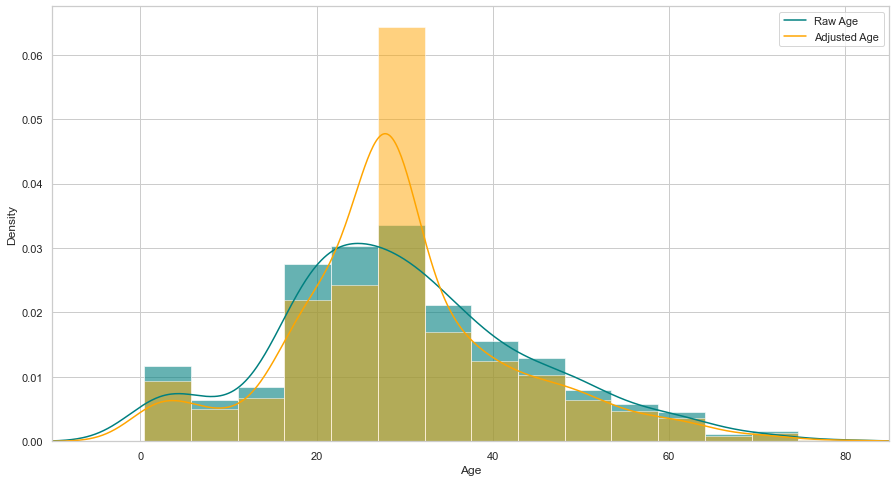

In [20]:
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

##### We can combine the "Sibsp" and "Parch" columns as family. So we can add a column with a boolean value representing whether or not the passenger was accompanied by a family member.

In [21]:
## Create categorical variable for traveling alone
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

Similarly we can also create categorical variables for the other remaining variables like: <br>
• P_class can be divided into three columns of Pclass1, Pclass2 and Pclass3 with value 1 if true and 0 if false. <br>
• Sex can be 1 if male and 0 if female. <br>
• Embarked will be divided into three columns Embarked_C, Embarked_Q and Embarked_S with value 1 if true and 0 if false.<br>
• 

In [22]:
#create categorical variables and drop some variables
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


The same changes will be applied to the test data.

In [23]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [24]:
test_data = test_df.copy()
#Replacing missing 'Age' values and 'Fare' values with the median
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)
#dropping sibling and parent columns after introducing TravelAlone
test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

#Creation of categorical variables
testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


### 3. Exploring the Data

#### 3.1 Age 

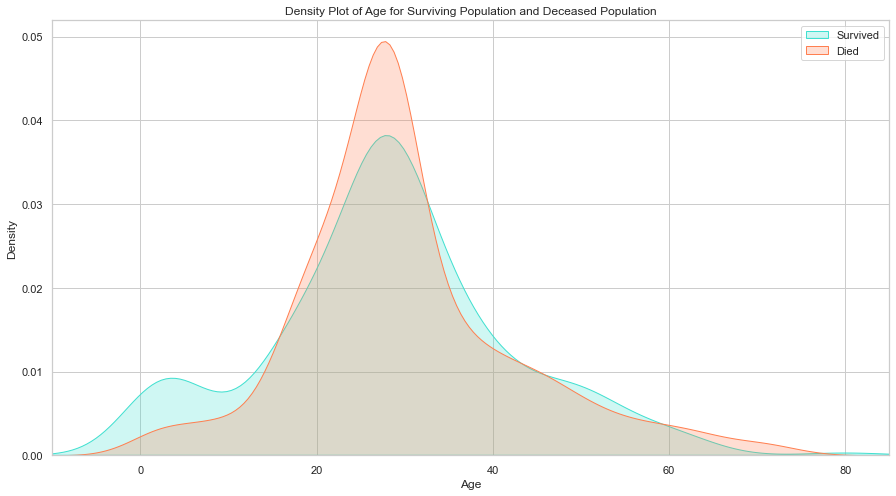

In [25]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="turquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="coral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

The age distribution for survivors and deceased is actually very similar. A large proportion of the survivors were children, this shows that the people made an attempt to save the children by letting them get on the lifeboats.

The percentage of survivors can be plotted age-wise to get a better idea as to which age groups had the best survival rate.

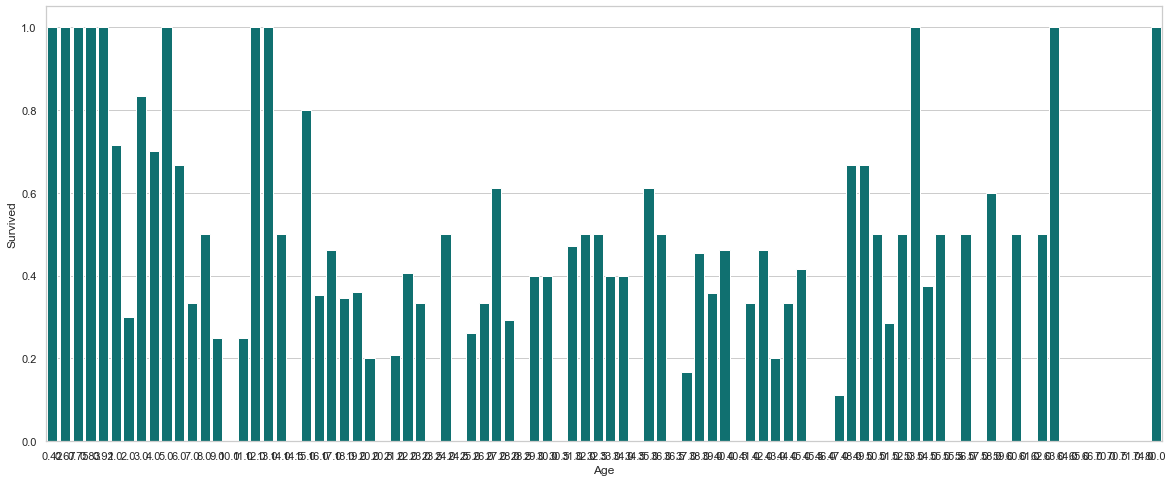

In [26]:
plt.figure(figsize=(20,8))
avg_survival_byage = final_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="Teal")
plt.show()

On seeing the survival rates of those under 16, we could create another categorical variable called 'Minor'

In [27]:
final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)

final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

#### 3.2 Fare

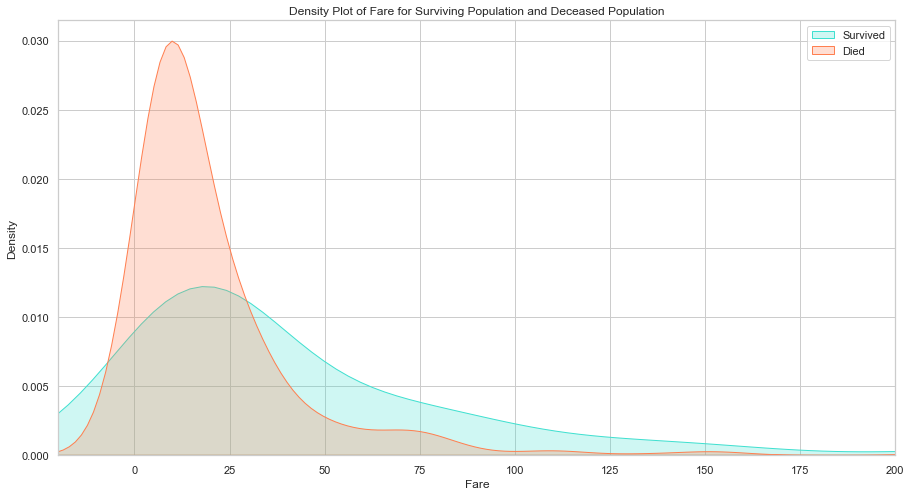

In [28]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="turquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="coral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

As the distributions are clearly different for the fares of survivors vs. deceased, it's likely that this would be a significant predictor in our final model. Passengers who paid lower fare appear to have been less likely to survive. <br>
A correlation with Passenger class can also be expected as higher class passengers should be more likely to survive.

##### Combining Age and Fare in one plot

Text(0.5, 1.0, 'Age and Fare Correlation with Survival')

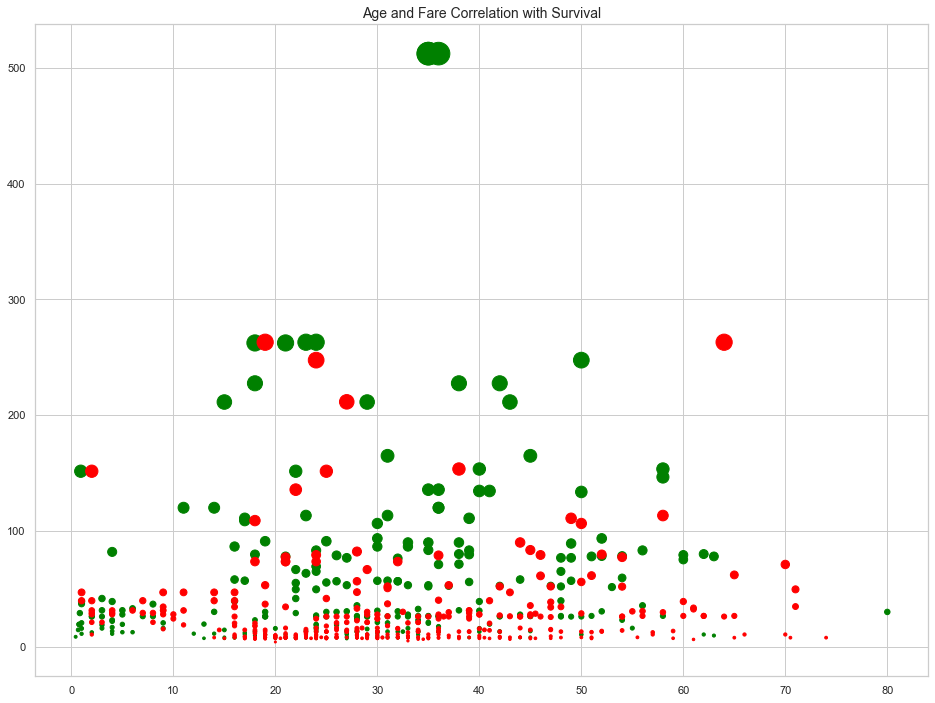

In [79]:
plt.figure(figsize=(16,12))
ax = plt.subplot()

ax.scatter(train_df[train_df['Survived'] == 1]['Age'],train_df[train_df['Survived']==1]['Fare'],c='green',s=train_df[train_df['Survived'] == 1]['Fare'])
ax.scatter(train_df[train_df['Survived'] == 0]['Age'],train_df[train_df['Survived']==0]['Fare'],c='red',s=train_df[train_df['Survived'] == 0]['Fare'])

ax.set_title('Age and Fare Correlation with Survival',
             fontsize = 14)

#### 3.3 Passenger class

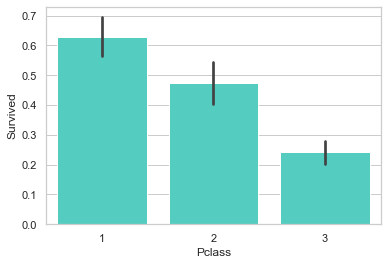

In [32]:
sns.barplot('Pclass', 'Survived', data=train_df, color="turquoise")
plt.show()

Being a first class passenger was the safest as we suspected.

#### 3.4 Embarked Port

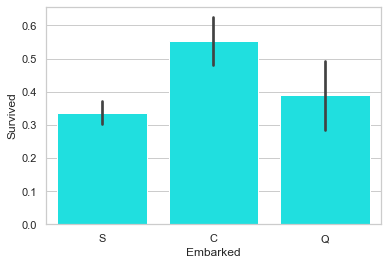

In [33]:
sns.barplot('Embarked', 'Survived', data=train_df, color="aqua")
plt.show()

Passengers who boarded in Cherbourg, France, appear to have the highest survival rate. Passengers who boarded in Southhampton were marginally less likely to survive than those who boarded in Queenstown. This is probably related to passenger class, or maybe even the order of room assignments (e.g. maybe earlier passengers were more likely to have rooms closer to deck).<br>
It's also worth noting the size of the whiskers in these plots. Because the number of passengers who boarded at Southhampton was highest, the confidence around the survival rate is the highest. The whisker of the Queenstown plot includes the Southhampton average, as well as the lower bound of its whisker. It's possible that Queenstown passengers were equally unlucky, or unluckier than the Southampton passengers.

#### 3.5 Traveling alone vs. with family

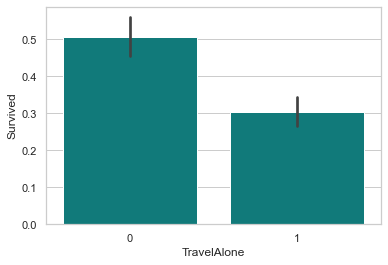

In [34]:
sns.barplot('TravelAlone', 'Survived', data=final_train, color="darkcyan")
plt.show()

Individuals traveling without family were more likely to die in the disaster than those with family aboard. Given the era, it's likely that individuals traveling alone were likely male. We shall see the gender based observation next.

#### 3.6 Gender

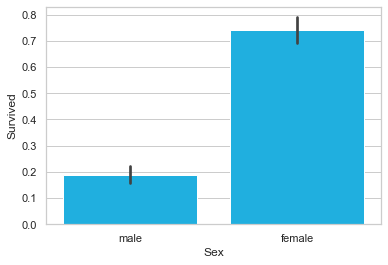

In [35]:
sns.barplot('Sex', 'Survived', data=train_df, color="deepskyblue")
plt.show()

Unsurprisingly, women were more likely to survive than men. The code of conduct, "Birkenhead drill" (Women and chidren first) seems to have been observed during the disaster.
***

### Logistic Regression

#### 4.1a Recursive feature elimination

Given an external estimator that assigns weights to features, recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a 'coef_ attribute' or through a 'feature_importances' attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X = final_train[cols]
y = final_train['Survived']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model, 8)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


#### 4.1b Feature ranking with recursive feature elimination and cross validation

RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features. Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the number of features selected with cross-validation.

Optimal number of features: 9
Selected features: ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


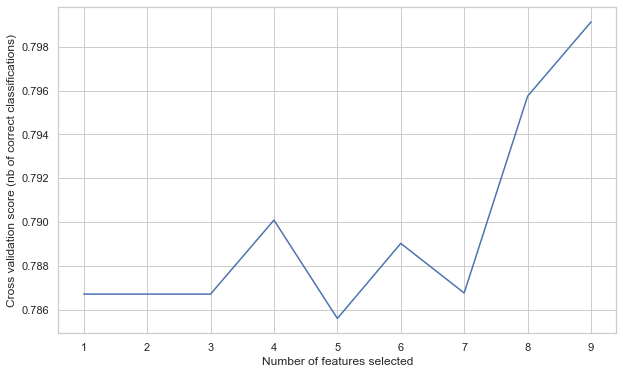

In [37]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

As we see, 9 variables are selected.

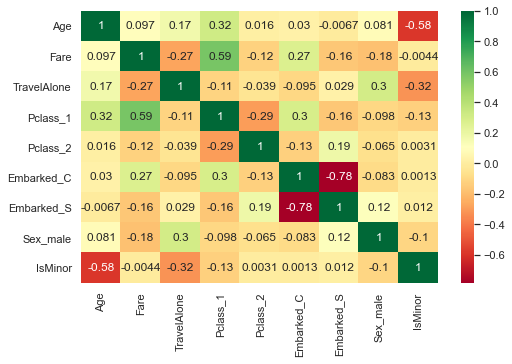

In [38]:
Selected_features = ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']
X = final_train[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

#### 4.2 Model Evaluation Procedure

We need to test the model we create on a dataset of which we know the results (whether a given passenger survived or not) in order to test the accuracy of the model. So, we need to create a split in the train dataset and train the model and then use the model to predict the results on the test portion of the same dataset 

##### 4.2.1. Model evaluation based on train/test split using train_test_split() function.

Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']
Train/Test split results:
LogisticRegression accuracy is 0.771
LogisticRegression log_loss is 0.506
LogisticRegression auc is 0.839


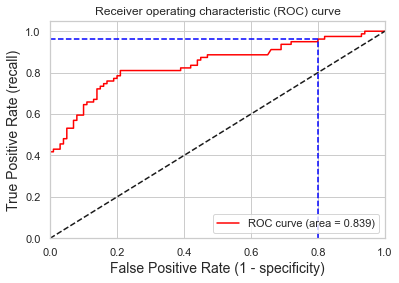

Using a threshold of 0.0668 guarantees a sensitivity of 0.9620 and a specificity of 0.2000, i.e. a false positive rate of 80.00%.


In [39]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features selected) and y (response desired)
X = final_train[Selected_features]
y = final_train['Survived']
print('Selected features: %s' % list(X.columns[rfe.support_]))

# use train/test split with different random_state values
# the random_state values that changes the accuracy scores can be changed
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.4f " % thr[idx] + "guarantees a sensitivity of %.4f " % tpr[idx] +  
      "and a specificity of %.4f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [40]:
confusion_matrix(y_pred,y_test)

array([[90, 31],
       [10, 48]], dtype=int64)

In [41]:
#4.2.2 K-fold cross validation using cross_val_score()

# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.799
LogisticRegression average log_loss is 0.455
LogisticRegression average auc is 0.849


In [42]:
#K-fold cross validaiton using cross_validate()

from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.799 (+/-0.028)
LogisticRegression average log_loss: 0.455 (+/-0.037)
LogisticRegression average auc: 0.849 (+/-0.028)


In [43]:
#What happens if we include Fare

cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"]
X = final_train[cols]

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, final_train[cols], y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.799 (+/-0.028)
LogisticRegression average log_loss: 0.455 (+/-0.037)
LogisticRegression average auc: 0.849 (+/-0.028)


#### 4.3 GridSearchCV evaluated using multiple scorers simultaneously 

best params: LogisticRegression(C=2.4000100000000004)
best params: {'C': 2.4000100000000004}
best score: 0.8013732833957553


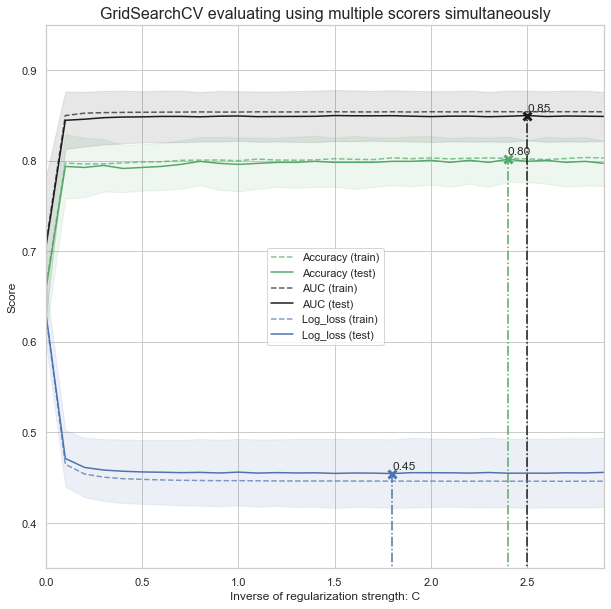

In [44]:
from sklearn.model_selection import GridSearchCV

X = final_train[Selected_features]

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

#### 4.4 GridSearchCV evaluating using multiple scorers, RepeatedStratifiedKFold

We can apply many tasks together for more in-depth evaluation like gridsearch using cross-validation based on k-folds repeated many times, that can be scaled or not with respect to many scorers and tuning on parameter for a given estimator!

best params: Pipeline(steps=[('scale', StandardScaler(with_mean=False, with_std=False)),
                ('clf', LogisticRegression(C=3.60001))])
best params: {'clf__C': 3.60001}
best score: 0.7988801707363002


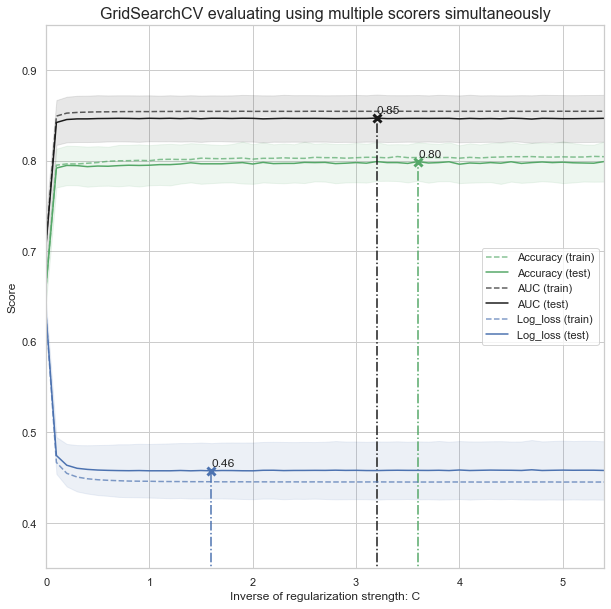

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

#Define simple model
###############################################################################
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression()

#Simple pre-processing estimators
###############################################################################
std_scale = StandardScaler(with_mean=False, with_std=False)
#std_scale = StandardScaler()

#Defining the CV method: Using the Repeated Stratified K Fold
###############################################################################

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

#Creating simple pipeline and defining the gridsearch
###############################################################################

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X, y)
results = log_clf.cv_results_

print('='*20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, C.max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_clf__C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [46]:
final_test['Survived'] = log_clf.predict(final_test[Selected_features])
final_test['PassengerId'] = test_df['PassengerId']

submission = final_test[['PassengerId','Survived']]

submission.to_csv("submission.csv", index=False)

submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [47]:
submission.info


<bound method DataFrame.info of      PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]>

In [49]:
submission.to_excel(r'E:\IITm\Sem 7\Data Analytics Lab\Assignment 2 Oct 3rd\final_pred.xlsx', index = False)

In [52]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:
submission['Survived']

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [54]:
test_fin_df = test_df.copy()
test_fin_df['Survived'] = submission['Survived']


In [55]:
test_fin_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


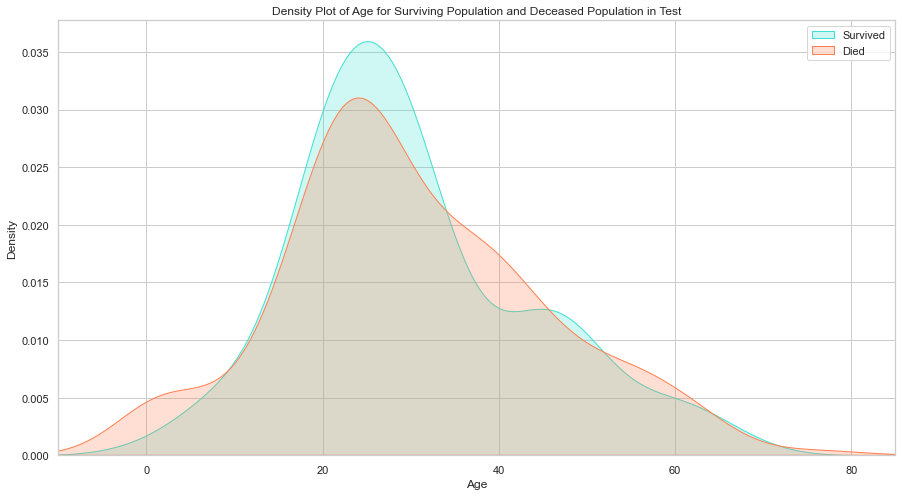

In [57]:
# Age vs Survival for Test
plt.figure(figsize=(15,8))
ax = sns.kdeplot(test_fin_df["Age"][final_train.Survived == 1], color="turquoise", shade=True)
sns.kdeplot(test_fin_df["Age"][final_train.Survived == 0], color="coral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population in Test')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

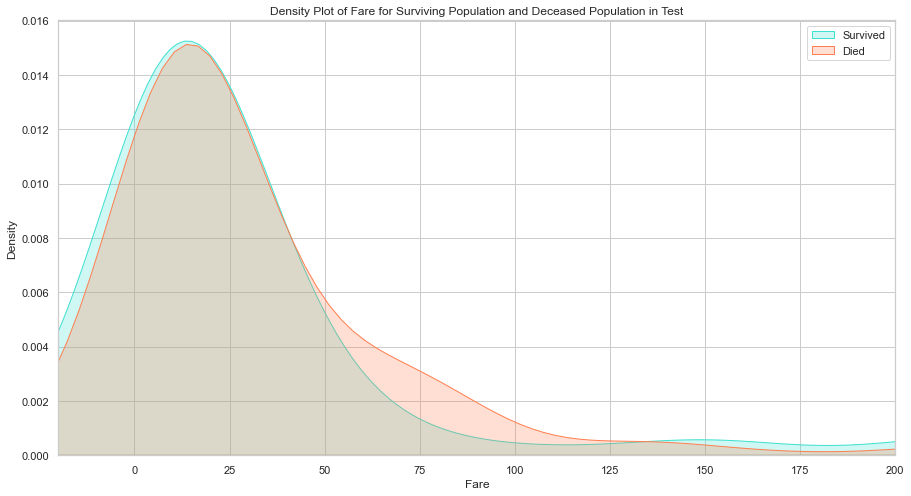

In [59]:
#Fare v Survival for Test
plt.figure(figsize=(15,8))
ax = sns.kdeplot(test_fin_df["Fare"][final_train.Survived == 1], color="turquoise", shade=True)
sns.kdeplot(test_fin_df["Fare"][final_train.Survived == 0], color="coral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population in Test')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

Text(0.5, 1.0, 'Age and Fare Correlation with Survival in Test')

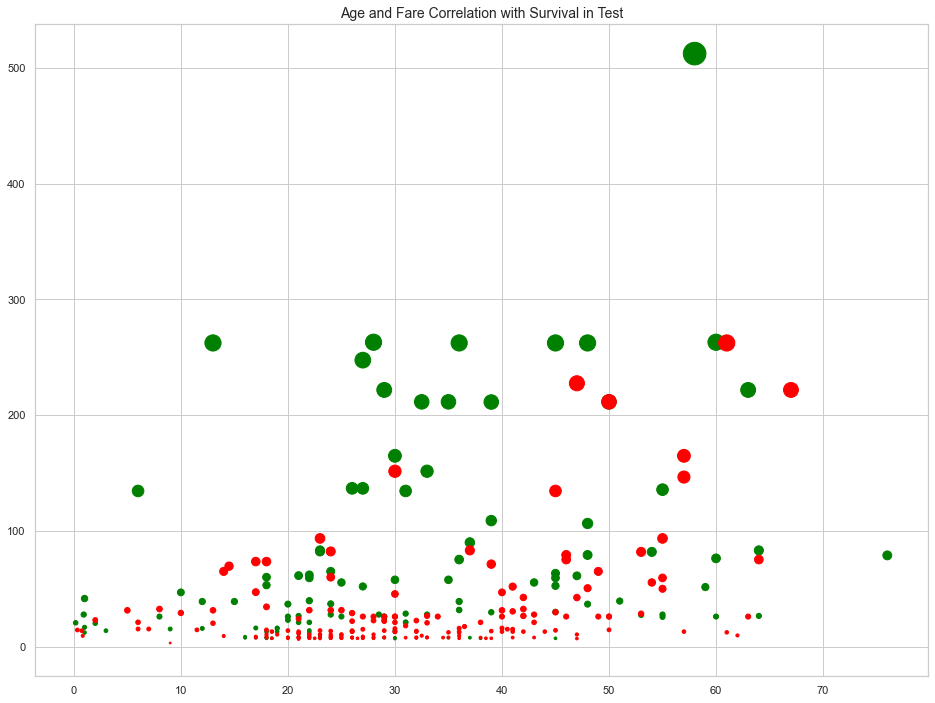

In [80]:
# Fare Age Correltion in Test
plt.figure(figsize=(16,12))
ax = plt.subplot()

ax.scatter(test_fin_df[test_fin_df['Survived'] == 1]['Age'],test_fin_df[test_fin_df['Survived']==1]['Fare'],c='green',s=test_fin_df[test_fin_df['Survived'] == 1]['Fare'])
ax.scatter(test_fin_df[test_fin_df['Survived'] == 0]['Age'],test_fin_df[test_fin_df['Survived']==0]['Fare'],c='red',s=test_fin_df[test_fin_df['Survived'] == 0]['Fare'])

ax.set_title('Age and Fare Correlation with Survival in Test',
             fontsize = 14)

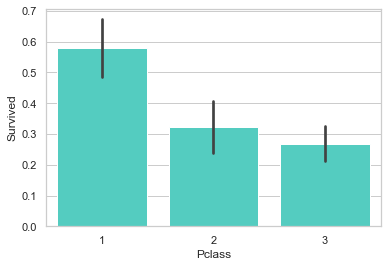

In [61]:
#Passenger Class in Test
sns.barplot('Pclass', 'Survived', data=test_fin_df, color="turquoise")
plt.show()

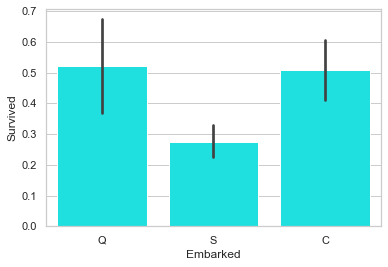

In [62]:
#Embarked port in Test
sns.barplot('Embarked', 'Survived', data=test_fin_df, color="aqua")
plt.show()

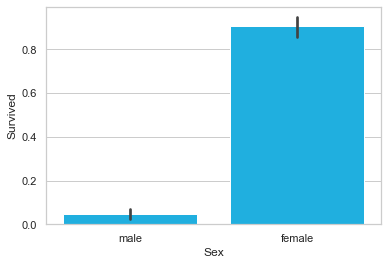

In [63]:
#Gender in Test
sns.barplot('Sex', 'Survived', data=test_fin_df, color="deepskyblue")
plt.show()

In [64]:
test_fin_df.to_excel(r'E:\IITm\Sem 7\Data Analytics Lab\Assignment 2 Oct 3rd\Predictions.xlsx', index = False)

In [67]:
frames = [train_df, test_fin_df]
total_df = pd.concat(frames)
total_df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

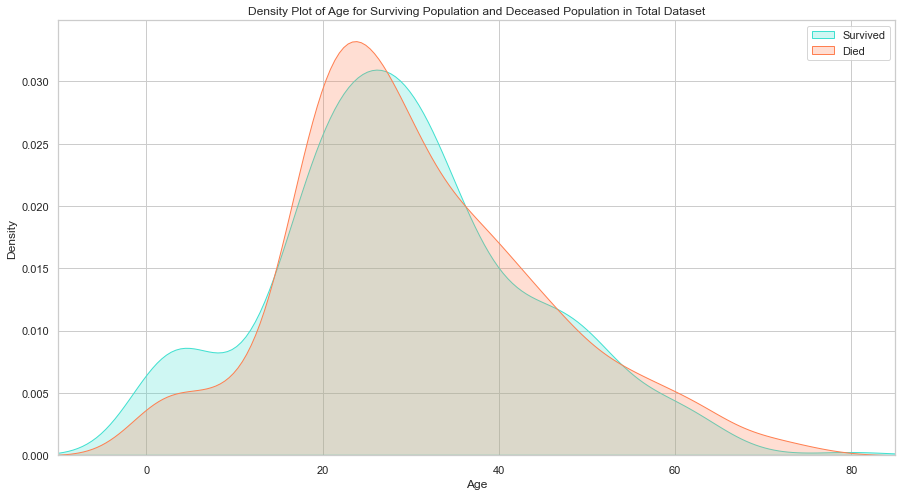

In [73]:
# Age vs Survival for Total
plt.figure(figsize=(15,8))
ax = sns.kdeplot(total_df["Age"][final_train.Survived == 1], color="turquoise", shade=True)
sns.kdeplot(total_df["Age"][final_train.Survived == 0], color="coral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population in Total Dataset')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

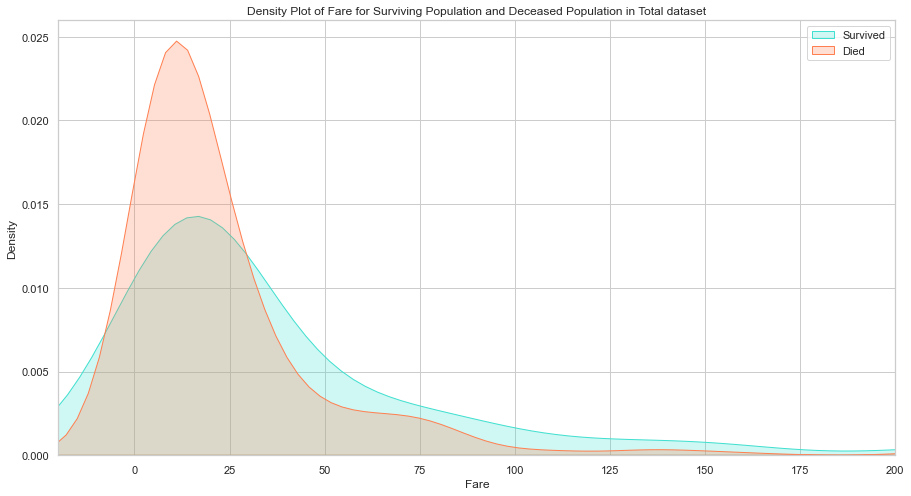

In [71]:
#Fare v Survival for Total
plt.figure(figsize=(15,8))
ax = sns.kdeplot(total_df["Fare"][final_train.Survived == 1], color="turquoise", shade=True)
sns.kdeplot(total_df["Fare"][final_train.Survived == 0], color="coral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population in Total dataset')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

Text(0.5, 1.0, 'Age and Fare Correlation with Survival in Total Dataset')

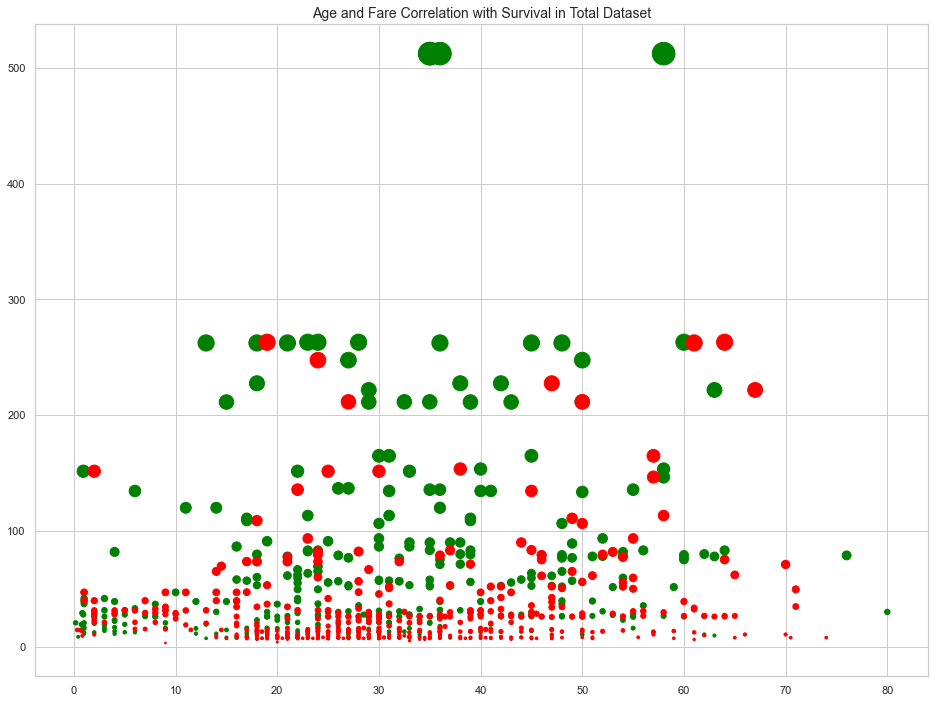

In [81]:
# Fare Age Correltion in Total
plt.figure(figsize=(16,12))
ax = plt.subplot()

ax.scatter(total_df[total_df['Survived'] == 1]['Age'],total_df[total_df['Survived']==1]['Fare'],c='green',s=total_df[total_df['Survived'] == 1]['Fare'])
ax.scatter(total_df[total_df['Survived'] == 0]['Age'],total_df[total_df['Survived']==0]['Fare'],c='red',s=total_df[total_df['Survived'] == 0]['Fare'])

ax.set_title('Age and Fare Correlation with Survival in Total Dataset',
             fontsize = 14)

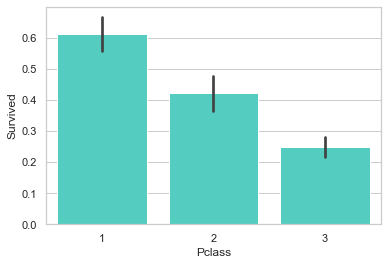

In [75]:
#Passenger Class in Total
sns.barplot('Pclass', 'Survived', data=total_df, color="turquoise")
plt.show()

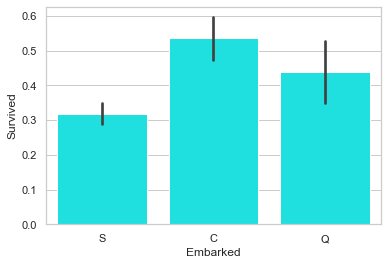

In [76]:
#Embarked port in Total
sns.barplot('Embarked', 'Survived', data=total_df, color="aqua")
plt.show()

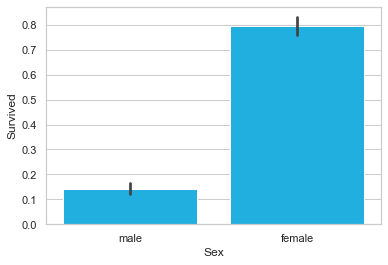

In [77]:
#Gender in Total
sns.barplot('Sex', 'Survived', data=total_df, color="deepskyblue")
plt.show()